<a href="https://colab.research.google.com/github/javadhaditaghi/pythonDaily/blob/main/ATM_flowchart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!apt-get install -y fonts-dejavu

^C


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


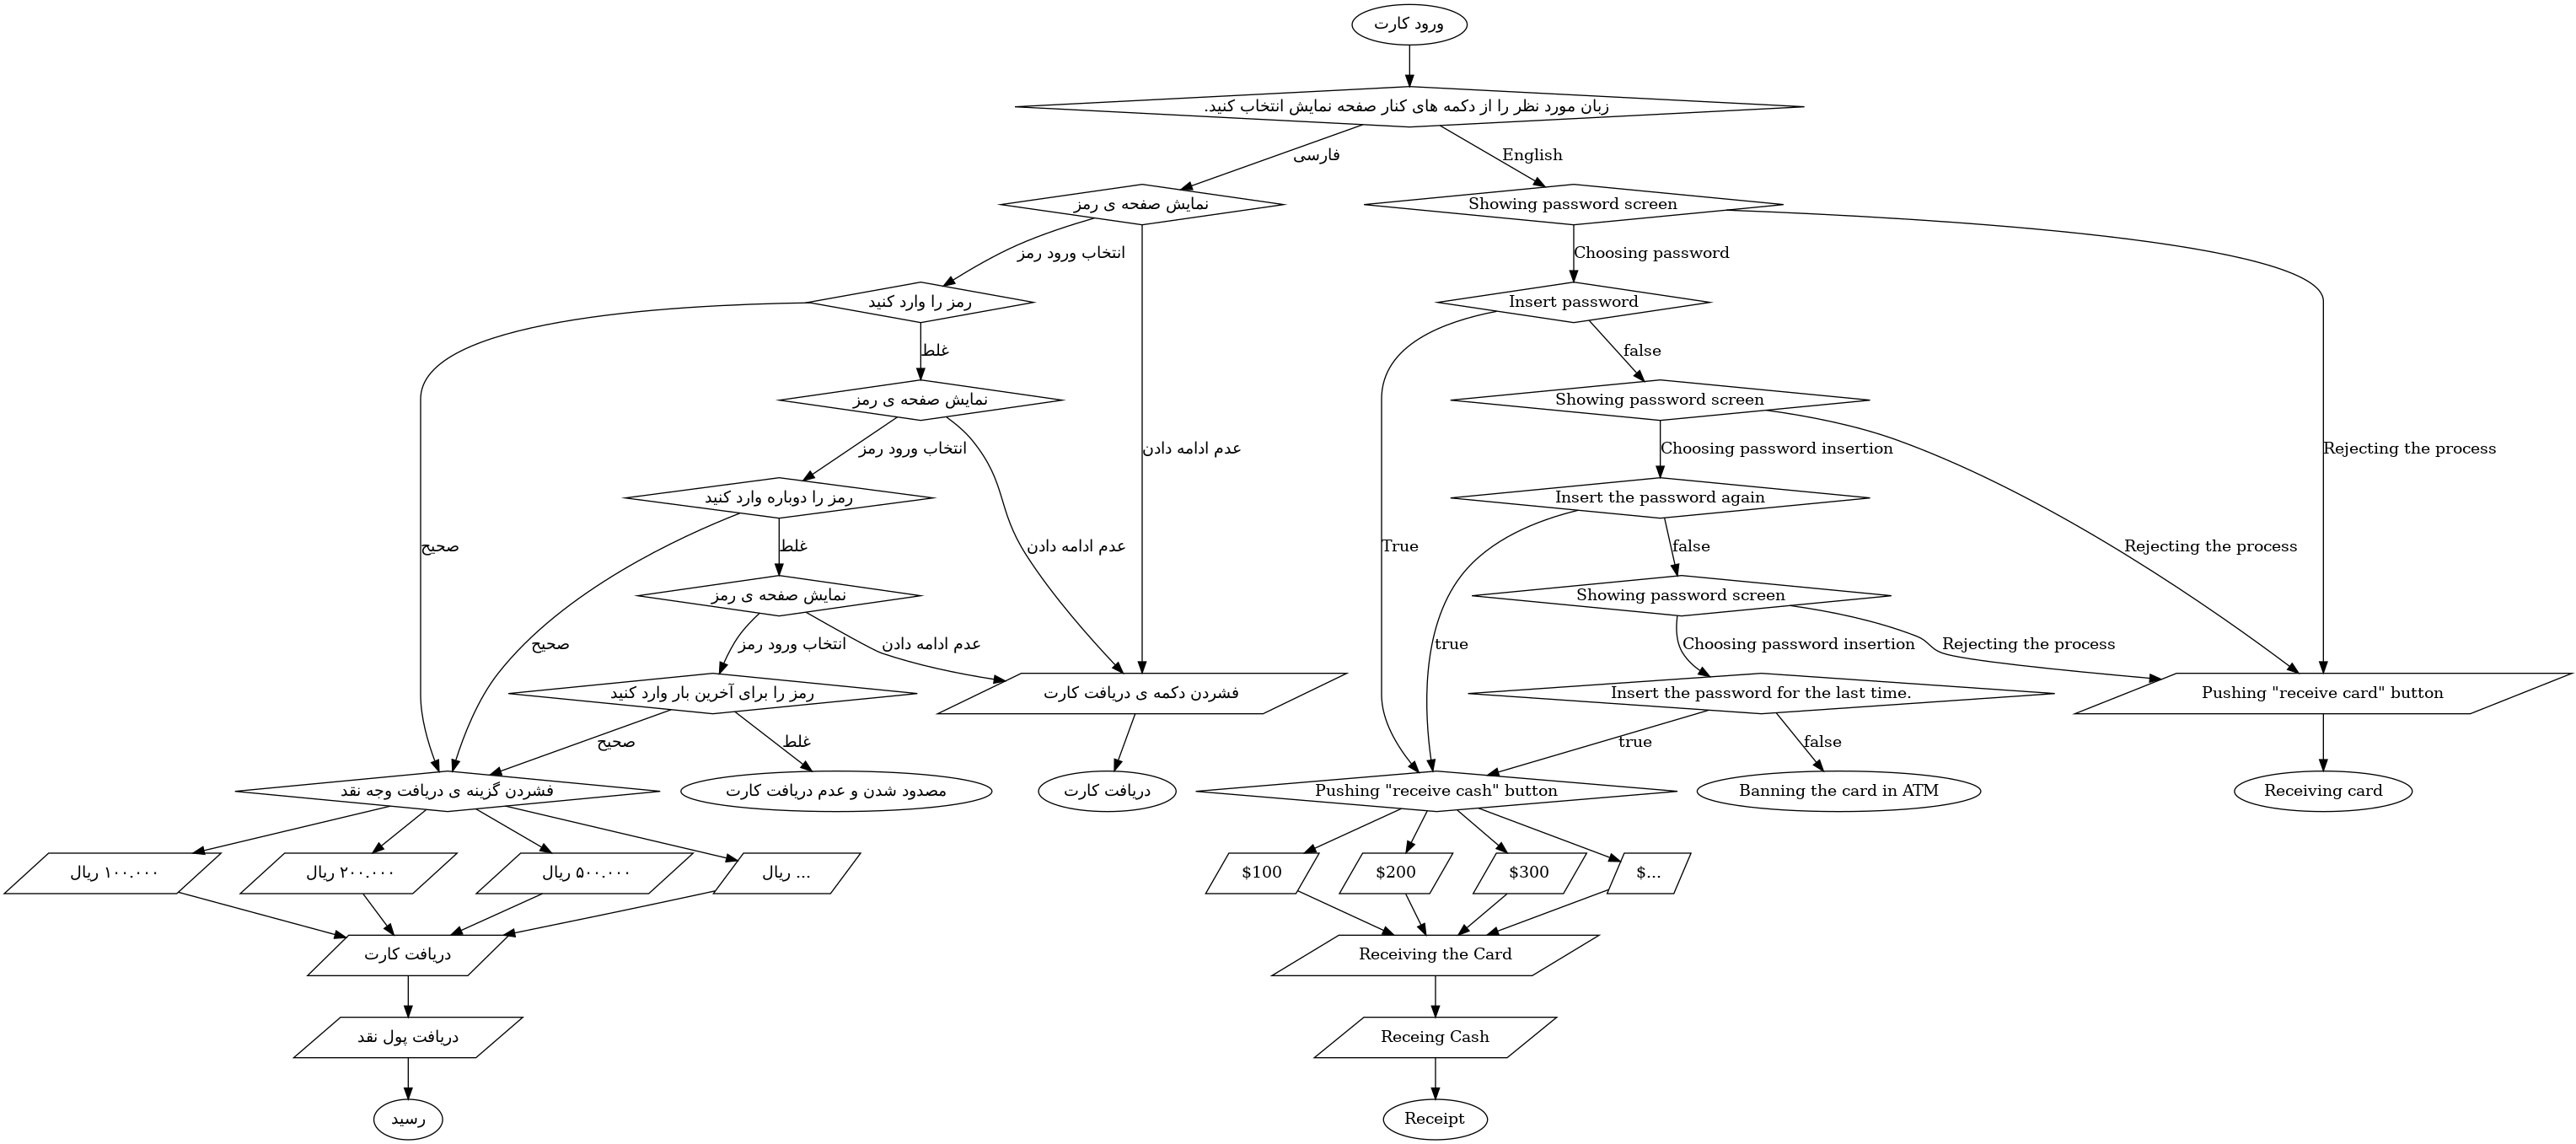

In [72]:
from graphviz import Digraph
from google.colab import drive



drive.mount('/content/drive')
output_dir = '/content/drive/My Drive/flowcharts/'
!mkdir -p "$output_dir"


# 0. مسیر خروجی
output_path = output_dir + 'flowchart_persian'


# 0. تعریف گراف و زبان فارسی
dot = Digraph()
dot.attr(fontname='DejaVu Sans')

# 1. وارد کردن کارت بانکی
dot.node('InsertCard', 'ورود کارت', shape='oval')
dot.edge('InsertCard', 'languageChoice')

# 2. زبان مورد نظر را از دکمه های کنار صفحه نمایش انتخاب کنید.
dot.node('languageChoice', ' زبان مورد نظر را از دکمه های کنار صفحه نمایش انتخاب کنید.', shape='diamond')



#3. فارسی/انگلیسی

dot.edge('languageChoice', 'persian', label='فارسی')
dot.edge('languageChoice', 'english', label='English')


# 4. مسیر فارسی

dot.node('persian', 'نمایش صفحه ی رمز', shape='diamond')
dot.edge('persian', 'insertPassword', label='انتخاب ورود رمز')

dot.edge('persian', 'reject', label='عدم ادامه دادن')
dot.node('reject', 'فشردن دکمه ی دریافت کارت', shape='parallelogram')

dot.edge('reject', 'card')
dot.node('card', 'دریافت کارت', shape='oval')


# 5. وارد کردن رمز - صحیح
dot.node('insertPassword', 'رمز را وارد کنید', shape='diamond')  # رمز به فارسی
dot.edge('insertPassword', 'receiveMoney', label='صحیح')


# 6. انتخاب گزینه ی دریافت وجه نقد
dot.node('receiveMoney', 'فشردن گزینه ی دریافت وجه نقد', shape='diamond')
dot.edge('receiveMoney', 'choosingAmount')
dot.edge('receiveMoney', 'choosingAmount1')
dot.edge('receiveMoney', 'choosingAmount2')
dot.edge('receiveMoney', 'choosingAmount3')


# 7. انتخاب مقدار پول نقد
dot.node('choosingAmount', '۱۰۰.۰۰۰ ریال ', shape='parallelogram')
dot.node('choosingAmount1', '۲۰۰.۰۰۰ ریال ', shape='parallelogram')
dot.node('choosingAmount2', '۵۰۰.۰۰۰ ریال ', shape='parallelogram')
dot.node('choosingAmount3', ' ... ریال ', shape='parallelogram')

dot.edge('choosingAmount', 'receivingCard')
dot.edge('choosingAmount1', 'receivingCard')
dot.edge('choosingAmount2', 'receivingCard')
dot.edge('choosingAmount3', 'receivingCard')



# 7. دریافت کارت از خود \رداز
dot.node('receivingCard', 'دریافت کارت', shape='parallelogram')
dot.edge('receivingCard', 'receivingCash')

# ۸. دریافت پول نقد از خود پرداز
dot.node('receivingCash', 'دریافت پول نقد', shape='parallelogram')
dot.edge('receivingCash', 'receivingReceipt')


# ۹. دریافت رسید
dot.node('receivingReceipt', 'رسید', shape='oval')





# 5a. وارد کردن رمز - غلط

dot.edge('insertPassword', 'showScreen', label='غلط')
dot.node('showScreen', 'نمایش صفحه ی رمز', shape='diamond')
dot.edge('showScreen', 'insertAgain', label='انتخاب ورود رمز')
dot.edge('showScreen', 'reject', label='عدم ادامه دادن')




# ۶. رمز را دوباره وارد کنید
dot.node('insertAgain', 'رمز را دوباره وارد کنید', shape='diamond')  # رمز به فارسی
dot.edge('insertAgain', 'receiveMoney', label='صحیح')
dot.edge('insertAgain', 'showScreen1', label='غلط')

dot.node('showScreen1', 'نمایش صفحه ی رمز', shape='diamond')
dot.edge('showScreen1', 'insertAgainLast', label='انتخاب ورود رمز')
dot.edge('showScreen1', 'reject', label='عدم ادامه دادن')


# ۶. رمز را دوباره وارد کنید


dot.node('insertAgainLast', 'رمز را برای آخرین بار وارد کنید', shape='diamond')  # رمز به فارسی
dot.edge('insertAgainLast', 'receiveMoney', label='صحیح')
dot.edge('insertAgainLast', 'banCard', label='غلط')

# ۷. مصدود شدن و عدم دریافت کارت
dot.node('banCard', 'مصدود شدن و عدم دریافت کارت', shape='oval'  )












# 4a. English path
dot.node('english', 'Insert your password', shape='diamond')  # رمز به انگلیسی
dot.node('english', 'Showing password screen', shape='diamond')
dot.edge('english', 'insertPassword-eng', label='Choosing password')

dot.edge('english', 'reject-eng', label='Rejecting the process')
dot.node('reject-eng', 'Pushing "receive card" button', shape='parallelogram')

dot.edge('reject-eng', 'card-eng')
dot.node('card-eng', 'Receiving card', shape='oval')


# 5. وارد کردن رمز - صحیح
dot.node('insertPassword-eng', 'Insert password', shape='diamond')  # رمز به فارسی
dot.edge('insertPassword-eng', 'receiveMoney-eng', label='True')


# 6. انتخاب گزینه ی دریافت وجه نقد
dot.node('receiveMoney-eng', 'Pushing "receive cash" button', shape='diamond')
dot.edge('receiveMoney-eng', 'choosingAmount-eng')
dot.edge('receiveMoney-eng', 'choosingAmount1-eng')
dot.edge('receiveMoney-eng', 'choosingAmount2-eng')
dot.edge('receiveMoney-eng', 'choosingAmount3-eng')


# 7. انتخاب مقدار پول نقد
dot.node('choosingAmount-eng', '$100', shape='parallelogram')
dot.node('choosingAmount1-eng', '$200', shape='parallelogram')
dot.node('choosingAmount2-eng', '$300', shape='parallelogram')
dot.node('choosingAmount3-eng', '$...', shape='parallelogram')

dot.edge('choosingAmount-eng', 'receivingCard-eng')
dot.edge('choosingAmount1-eng', 'receivingCard-eng')
dot.edge('choosingAmount2-eng', 'receivingCard-eng')
dot.edge('choosingAmount3-eng', 'receivingCard-eng')



# 7. دریافت کارت از خود \رداز
dot.node('receivingCard-eng', 'Receiving the Card', shape='parallelogram')
dot.edge('receivingCard-eng', 'receivingCash-eng')

# ۸. دریافت پول نقد از خود پرداز
dot.node('receivingCash-eng', 'Receing Cash', shape='parallelogram')
dot.edge('receivingCash-eng', 'receivingReceipt-eng')


# ۹. دریافت رسید
dot.node('receivingReceipt-eng', 'Receipt', shape='oval')


# 5a. وارد کردن رمز - غلط

dot.edge('insertPassword-eng', 'showScreen-eng', label='false')
dot.node('showScreen-eng', 'Showing password screen', shape='diamond')
dot.edge('showScreen-eng', 'insertAgain-eng', label='Choosing password insertion')
dot.edge('showScreen-eng', 'reject-eng', label='Rejecting the process')




# ۶. رمز را دوباره وارد کنید
dot.node('insertAgain-eng', 'Insert the password again', shape='diamond')  # رمز به فارسی
dot.edge('insertAgain-eng', 'receiveMoney-eng', label='true')
dot.edge('insertAgain-eng', 'showScreen1-eng', label='false')

dot.node('showScreen1-eng', 'Showing password screen', shape='diamond')
dot.edge('showScreen1-eng', 'insertAgainLast-eng', label='Choosing password insertion')
dot.edge('showScreen1-eng', 'reject-eng', label='Rejecting the process')


# ۶. رمز را دوباره وارد کنید


dot.node('insertAgainLast-eng', 'Insert the password for the last time.', shape='diamond')  # رمز به فارسی
dot.edge('insertAgainLast-eng', 'receiveMoney-eng', label='true')
dot.edge('insertAgainLast-eng', 'banCard-eng', label='false')

# ۷. مصدود شدن و عدم دریافت کارت
dot.node('banCard-eng', 'Banning the card in ATM', shape='oval'  )








dot.render(output_path, format='png')

from IPython.display import Image
Image(filename=output_path + '.png')
